In [2]:
import pandas  as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings

warnings.filterwarnings("ignore")  

### Model Building
### Analysis and reporting
### validate and assumptions
### handling missing values
### feature engineering
### detecting outliers

# Univariate ananlysis on Numeric Columns
## 1. Age
**conclusion**
- Age is almost normally distributed
- 20% of the values are missing
- There are some outliers

In [3]:
df = pd.read_csv("train.csv")

In [7]:
df['Age'].isnull().sum()

177

In [8]:
df.Age.isnull().sum()

177

In [9]:
df.Age.isnull().sum()/len(df.Age)*100

19.865319865319865

In [10]:
df['Age'].describe()

count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64

<Axes: ylabel='Frequency'>

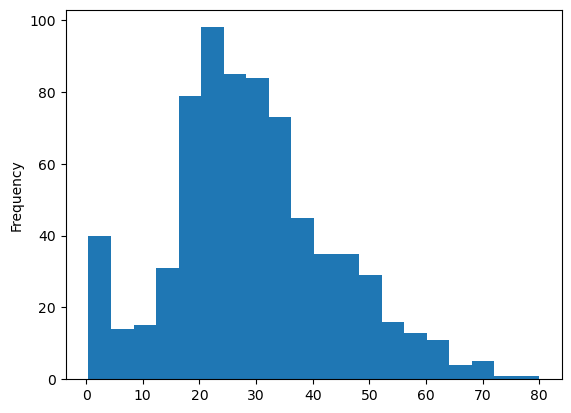

In [15]:
df.Age.plot(kind = 'hist' , bins = 20)

<Axes: ylabel='Density'>

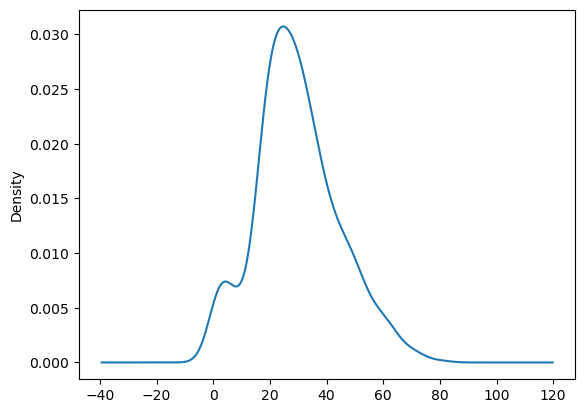

In [16]:
df.Age.plot(kind = 'kde')

In [17]:
df.Age.skew()

0.38910778230082704

<Axes: >

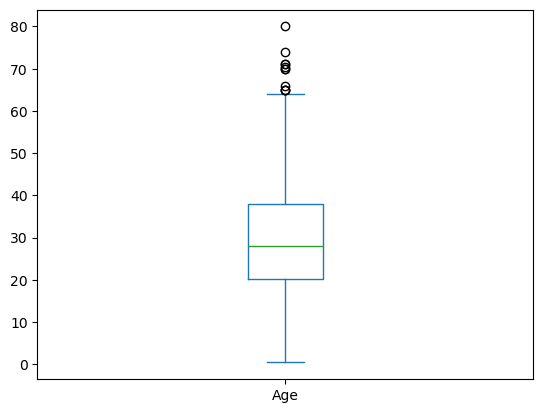

In [18]:
df.Age.plot(kind = 'box')

### Now check the outliers we are getting are really outliers or not

In [19]:
df[df['Age']>65]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
33,34,0,2,"Wheadon, Mr. Edward H",male,66.0,0,0,C.A. 24579,10.5000,NaN,S
96,97,0,1,"Goldschmidt, Mr. George B",male,71.0,0,0,PC 17754,34.6542,A5,C
116,117,0,3,"Connors, Mr. Patrick",male,70.5,0,0,370369,7.7500,NaN,Q
493,494,0,1,"Artagaveytia, Mr. Ramon",male,71.0,0,0,PC 17609,49.5042,NaN,C
630,631,1,1,"Barkworth, Mr. Algernon Henry Wilson",male,80.0,0,0,27042,30.0000,A23,S
672,673,0,2,"Mitchell, Mr. Henry Michael",male,70.0,0,0,C.A. 24580,10.5000,NaN,S
745,746,0,1,"Crosby, Capt. Edward Gifford",male,70.0,1,1,WE/P 5735,71.0000,B22,S
851,852,0,3,"Svensson, Mr. Johan",male,74.0,0,0,347060,7.7750,NaN,S


## 2. Fare
**conclusions**
-  the data is highly skewed
--  we will not be able to perform some statistical tests which assume that our data is normally distributed
- fare col actually contains the group fare not the  individual( this might be an issue )
- we need to create a new col which contains individual fare

In [20]:
df.Fare.isnull().sum()

0

In [21]:
df.Fare.describe()

count    891.000000
mean      32.204208
std       49.693429
min        0.000000
25%        7.910400
50%       14.454200
75%       31.000000
max      512.329200
Name: Fare, dtype: float64

<Axes: ylabel='Frequency'>

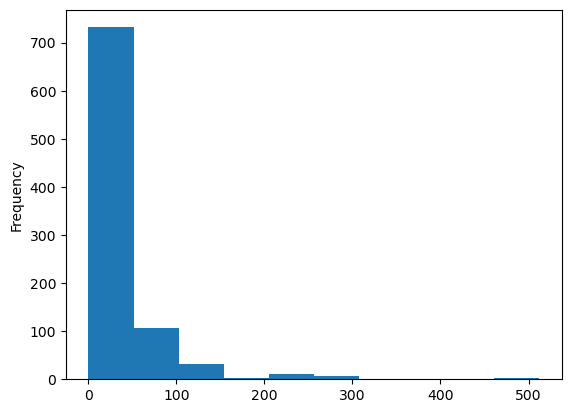

In [8]:
df.Fare.plot(kind = 'hist')

<Axes: ylabel='Density'>

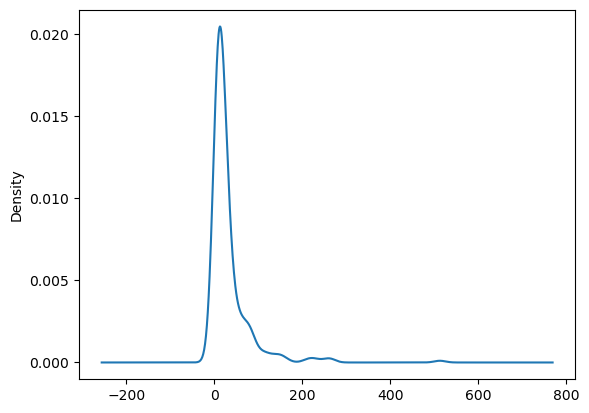

In [23]:
df.Fare.plot(kind = 'kde')

In [24]:
df.Fare.skew()

4.787316519674893

<Axes: >

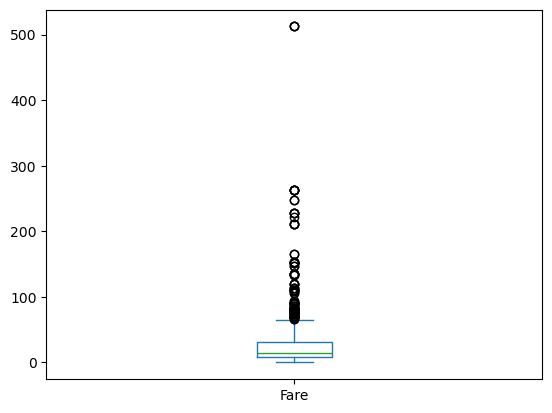

In [25]:
df.Fare.plot(kind = 'box')

In [28]:
df[df.Fare>100]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
27,28,0,1,"Fortune, Mr. Charles Alexander",male,19.00,3,2,19950,263.0000,C23 C25 C27,S
31,32,1,1,"Spencer, Mrs. William Augustus (Marie Eugenie)",female,NaN,1,0,PC 17569,146.5208,B78,C
88,89,1,1,"Fortune, Miss. Mabel Helen",female,23.00,3,2,19950,263.0000,C23 C25 C27,S
118,119,0,1,"Baxter, Mr. Quigg Edmond",male,24.00,0,1,PC 17558,247.5208,B58 B60,C
195,196,1,1,"Lurette, Miss. Elise",female,58.00,0,0,PC 17569,146.5208,B80,C
215,216,1,1,"Newell, Miss. Madeleine",female,31.00,1,0,35273,113.2750,D36,C
258,259,1,1,"Ward, Miss. Anna",female,35.00,0,0,PC 17755,512.3292,NaN,C
268,269,1,1,"Graham, Mrs. William Thompson (Edith Junkins)",female,58.00,0,1,PC 17582,153.4625,C125,S
269,270,1,1,"Bissette, Miss. Amelia",female,35.00,0,0,PC 17760,135.6333,C99,S
297,298,0,1,"Allison, Miss. Helen Loraine",female,2.00,1,2,113781,151.5500,C22 C26,S


## isse Ky samjh aaya?

### The fare is for group of peoples not individual

In [20]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


# Univariate analysis on Categorical Columns

## 1. Survive column
**conclusions**
- no null values
- there are more dead persons then survived

In [30]:
df.Survived.value_counts()

Survived
0    549
1    342
Name: count, dtype: int64

In [31]:
df.Survived.isnull().sum()

0

<Axes: xlabel='Survived'>

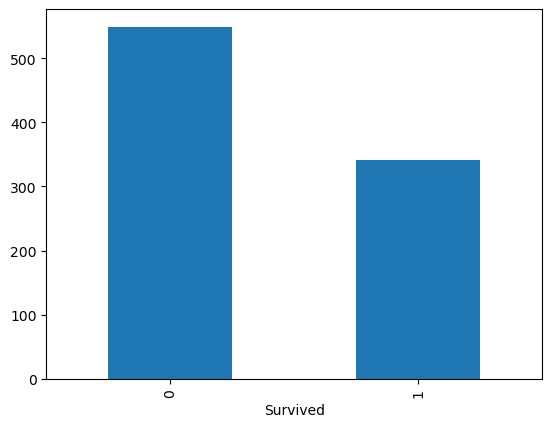

In [6]:
df.Survived.value_counts().plot(kind = 'bar' )

<Axes: xlabel='Survived', ylabel='count'>

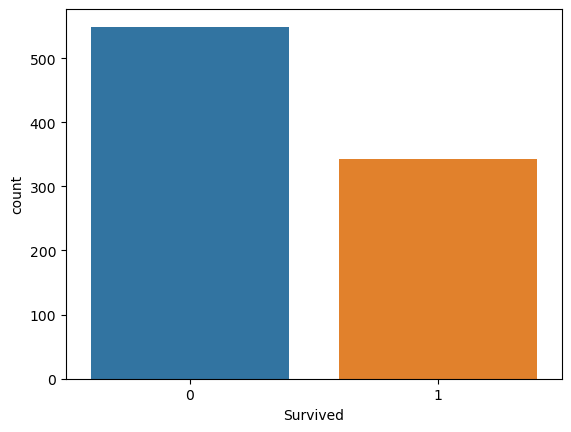

In [33]:
sns.countplot(x= 'Survived' , data = df)

<Axes: ylabel='count'>

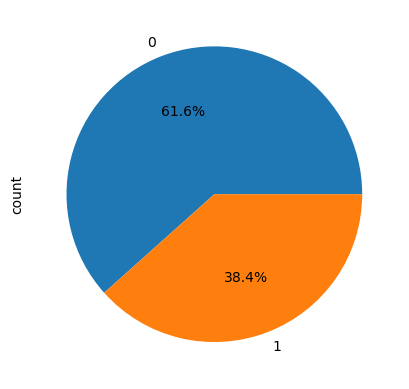

In [22]:
df.Survived.value_counts().plot(kind = 'pie' , autopct = '%0.f%%')

([<matplotlib.patches.Wedge at 0x1ad54046f90>,
 [Text(-0.3925749350994583, 1.0275626113924428, ''),
  Text(0.42826367051652175, -1.1209773541493675, '')],
 [Text(-0.21413178278152267, 0.5604886971231505, '61.6%'),
  Text(0.249820474467971, -0.6539034565871309, '38.4%')])

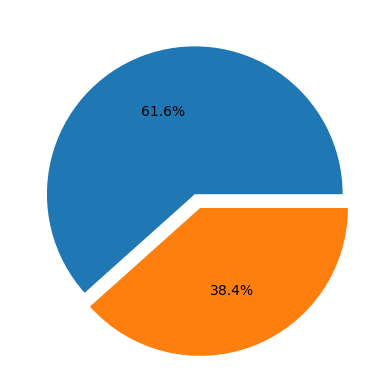

In [35]:
plt.pie(df.Survived.value_counts() ,explode = [0,0.1], autopct = '%.1f%%')

## 2. Pclass
**conclusions**
- more passwngers in 1st class then 2nd class

In [36]:
df.Pclass.value_counts()

Pclass
3    491
1    216
2    184
Name: count, dtype: int64

In [37]:
df.Pclass.isnull().sum()

0

<Axes: xlabel='Pclass', ylabel='count'>

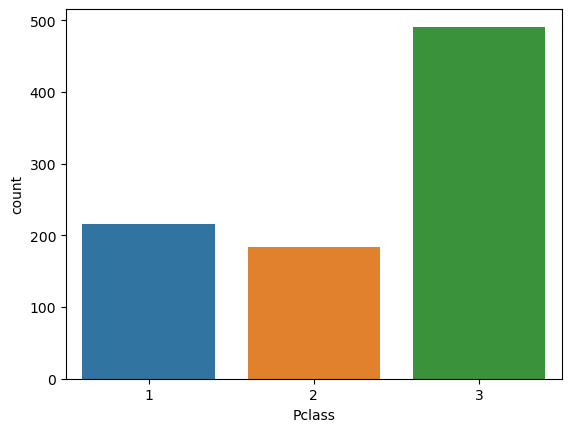

In [38]:
sns.countplot(x = 'Pclass' , data = df)

([<matplotlib.patches.Wedge at 0x1ad5424d950>,
 [Text(-0.17571616709359641, 1.0858746836637898, '0'),
  Text(-0.5160762002061153, -0.9714243951954356, '1'),
  Text(0.9561939770900165, -0.7250469489466027, '2')],
 [Text(-0.09584518205105258, 0.5922952819984307, '55.1%'),
  Text(-0.2814961092033356, -0.5298678519247829, '24.2%'),
  Text(0.5577798199691761, -0.42294405355218484, '20.7%')])

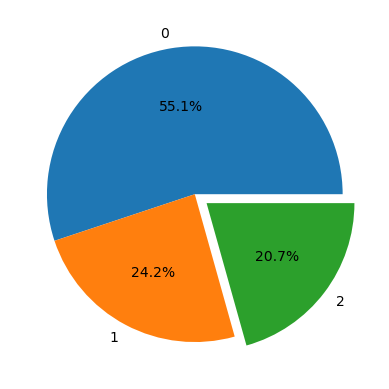

In [39]:
plt.pie(df.Pclass.value_counts() ,explode = [0 ,0 ,.1],labels = [0,1,2], autopct = '%.1f%%')

## 3. Sex
**conclusions**

In [40]:
df.Sex.value_counts()

Sex
male      577
female    314
Name: count, dtype: int64

In [41]:
df.Sex.isnull().sum()

0

<Axes: xlabel='Sex', ylabel='count'>

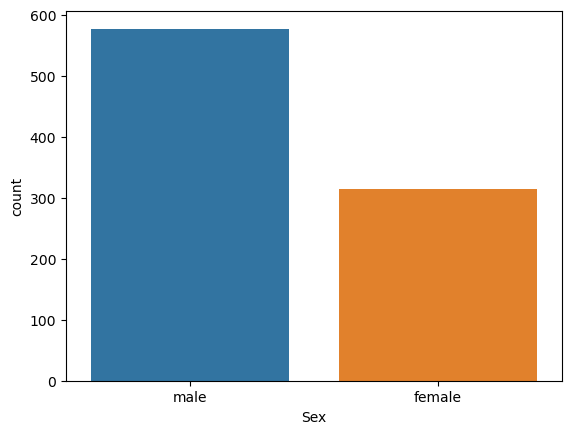

In [42]:
sns.countplot(x = 'Sex' , data = df)

([<matplotlib.patches.Wedge at 0x1ad55471a50>,
 [Text(-0.4919454136803954, 0.9838646807152012, 'male'),
  Text(0.4919455057964525, -0.9838646346559433, 'female')],
 [Text(-0.2683338620074884, 0.5366534622082915, '64.8%'),
  Text(0.26833391225261044, -0.53665343708506, '35.2%')])

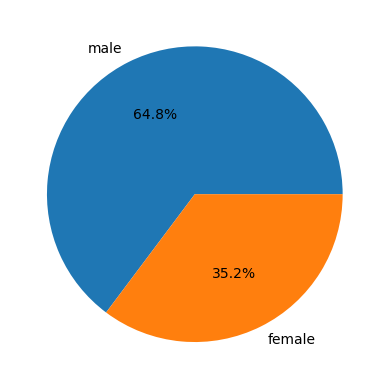

In [43]:
plt.pie(df.Sex.value_counts() , labels = ['male' , 'female'] , autopct= '%.1f%%')

## 4. Sibsp
**conclusions**

In [44]:
df.SibSp.value_counts()

SibSp
0    608
1    209
2     28
4     18
3     16
8      7
5      5
Name: count, dtype: int64

In [45]:
df.SibSp.isnull().sum()

0

<Axes: xlabel='SibSp', ylabel='count'>

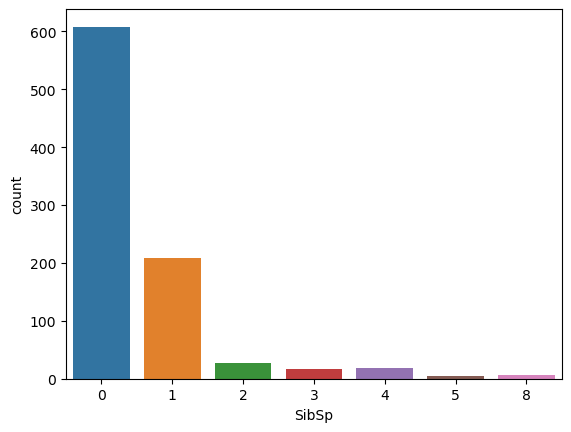

In [46]:
sns.countplot(x = 'SibSp' , data = df)

([<matplotlib.patches.Wedge at 0x1ad55335b50>,
 [Text(-0.596335425299201, 0.9243289785207544, '0'),
  Text(0.33770481176055295, -1.0468789137783652, '1'),
  Text(1.0029980041727713, -0.45165806051197366, '2'),
  Text(1.0627689715338293, -0.28376418580385865, '3'),
  Text(1.089077888508049, -0.15462649437547848, '4'),
  Text(1.0980245143543599, -0.06589511269337359, '5'),
  Text(1.0998290643754833, -0.019391471190945954, '8')],
 [Text(-0.3252738683450187, 0.5041794428295023, '68.2%'),
  Text(0.18420262459666523, -0.5710248620609264, '23.5%'),
  Text(0.5470898204578751, -0.24635894209744014, '3.1%'),
  Text(0.5796921662911796, -0.15478046498392287, '2.0%'),
  Text(0.5940424846407539, -0.08434172420480643, '1.8%'),
  Text(0.5989224623751053, -0.035942788741840134, '0.8%'),
  Text(0.5999067623866272, -0.010577166104152338, '0.6%')])

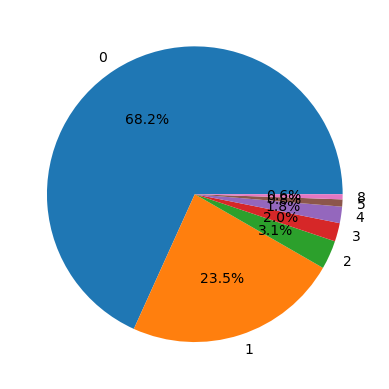

In [47]:
plt.pie(df.SibSp.value_counts() , labels = [0,1,2,3,4,5,8] , autopct = '%.1f%%')

## 4. Parch

**conclusions**
- Parch and SbSp cols can be merged and called family size
- create a new col called is alone

In [48]:
df.Parch.value_counts()

Parch
0    678
1    118
2     80
5      5
3      5
4      4
6      1
Name: count, dtype: int64

In [49]:
df.Parch.isnull().sum()

0

<Axes: xlabel='Parch', ylabel='count'>

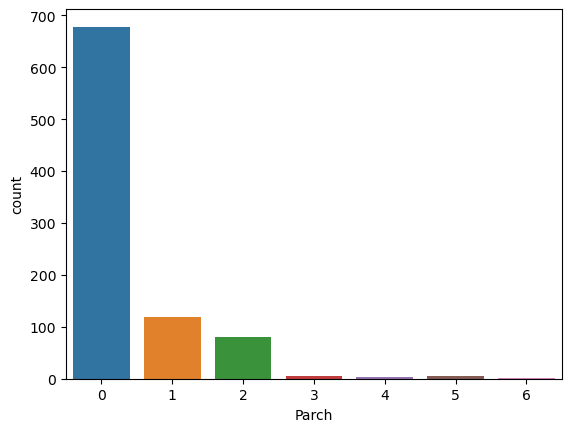

In [50]:
sns.countplot(x = 'Parch' , data = df)

([<matplotlib.patches.Wedge at 0x1ad553d1a50>,
 [Text(-0.804092179728483, 0.750623585094085, ''),
  Text(0.5126478637981279, -0.973237981042261, ''),
  Text(1.018296364993601, -0.41601984693139255, ''),
  Text(1.0957292322146563, -0.09683723287186521, ''),
  Text(1.098461885865451, -0.05815053998818253, ''),
  Text(1.0997538533271654, -0.023269338023504005, ''),
  Text(1.0999931622972063, -0.0038785176797351347, '')],
 [Text(-0.43859573439735433, 0.4094310464149554, '76.1%'),
  Text(0.2796261075262515, -0.5308570805685059, '13.2%'),
  Text(0.5554343809056005, -0.22691991650803228, '9.0%'),
  Text(0.5976704902989034, -0.0528203088391992, '0.6%'),
  Text(0.5991610286538823, -0.03171847635719047, '0.6%'),
  Text(0.5998657381784537, -0.012692366194638547, '0.4%'),
  Text(0.5999962703439307, -0.002115555098037346, '0.1%')])

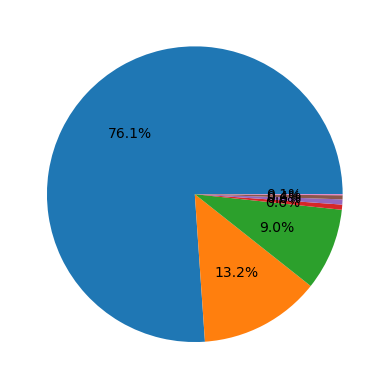

In [51]:
plt.pie(df.Parch.value_counts() , autopct = '%.1f%%')

## 5. Embarked


In [52]:
df.Embarked.value_counts()

Embarked
S    644
C    168
Q     77
Name: count, dtype: int64

In [53]:
df.Embarked.isnull().sum()

2

<Axes: xlabel='Embarked', ylabel='count'>

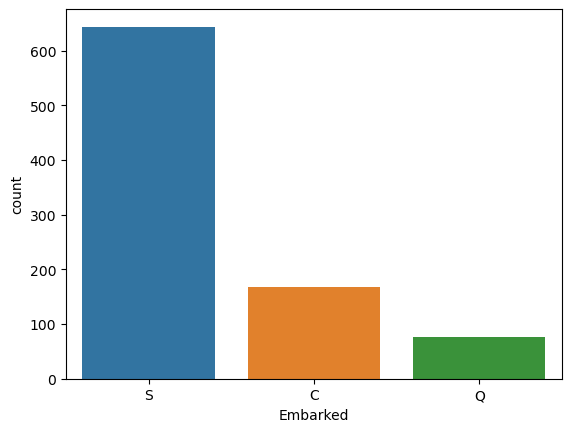

In [54]:
sns.countplot(x = 'Embarked' , data =df)

([<matplotlib.patches.Wedge at 0x1ad555e9a50>,
 [Text(-0.7128398214280038, 0.8377704870586524, 's'),
  Text(0.4614522559226597, -0.9985298270476893, 'c'),
  Text(1.0595276168013974, -0.29563698894954155, 'q')],
 [Text(-0.38882172077891114, 0.4569657202138104, '72.4%'),
  Text(0.25170123050326887, -0.5446526329351032, '18.9%'),
  Text(0.577924154618944, -0.16125653942702264, '8.7%')])

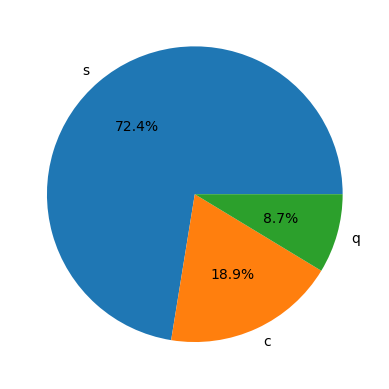

In [55]:
plt.pie(df.Embarked.value_counts() , labels = ['s','c' , 'q'] , autopct = '%.1f%%')

# Mixed  columns
- need to feature engineer to get more insights

# Bivariate Analysis

In [56]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


## categorical-categorical

### cross tabulations
- we will check how many people died in pclass

In [57]:
pd.crosstab(df.Survived , df.Pclass)

Pclass,1,2,3
Survived,,,
0,80,97,372
1,136,87,119


In [58]:
# we can also check it in percentage
pd.crosstab(df.Survived , df.Pclass , normalize = 'columns')*100

Pclass,1,2,3
Survived,,,
0,37.037037,52.717391,75.763747
1,62.962963,47.282609,24.236253


In [59]:
pd.crosstab(df.Survived , df.Sex , normalize = 'columns')*100


Sex,female,male
Survived,,
0,25.796178,81.109185
1,74.203822,18.890815


In [60]:
pd.crosstab(df.Survived , df.Embarked, normalize = 'columns')*100


Embarked,C,Q,S
Survived,,,
0,44.642857,61.038961,66.304348
1,55.357143,38.961039,33.695652


# conclusion
in comparision to other 2 percentage of c is higher now there might be two reasons
- c se chadne vaale jyada log p class 1 ke ho 
- c se chadne vaale jyda females ho

In [61]:
pd.crosstab(df.Embarked , df.Sex , normalize = 'columns')*100


Sex,female,male
Embarked,,
C,23.397436,16.464471
Q,11.538462,7.105719
S,65.064103,76.429809


In [62]:
pd.crosstab(df.Embarked , df.Pclass , normalize = 'columns')*100


Pclass,1,2,3
Embarked,,,
C,39.719626,9.239130,13.441955
Q,0.934579,1.630435,14.663951
S,59.345794,89.130435,71.894094


# categorical-numerical

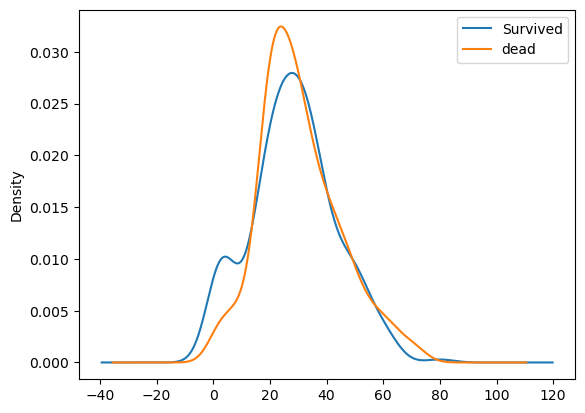

In [63]:
df[df.Survived ==1]['Age'].plot(kind = 'kde' , label = 'Survived')
df[df.Survived ==0]['Age'].plot(kind = 'kde' , label = 'dead')
plt.legend()

In [64]:
df[df.Pclass == 1]['Age'].mean()

38.233440860215055

# Feature Engineering
## Fare

In [65]:
df.SibSp.value_counts()

SibSp
0    608
1    209
2     28
4     18
3     16
8      7
5      5
Name: count, dtype: int64

In [66]:
df[df.SibSp ==8]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
159,160,0,3,"Sage, Master. Thomas Henry",male,NaN,8,2,CA. 2343,69.55,NaN,S
180,181,0,3,"Sage, Miss. Constance Gladys",female,NaN,8,2,CA. 2343,69.55,NaN,S
201,202,0,3,"Sage, Mr. Frederick",male,NaN,8,2,CA. 2343,69.55,NaN,S
324,325,0,3,"Sage, Mr. George John Jr",male,NaN,8,2,CA. 2343,69.55,NaN,S
792,793,0,3,"Sage, Miss. Stella Anna",female,NaN,8,2,CA. 2343,69.55,NaN,S
846,847,0,3,"Sage, Mr. Douglas Bullen",male,NaN,8,2,CA. 2343,69.55,NaN,S
863,864,0,3,"Sage, Miss. Dorothy Edith ""Dolly""",female,NaN,8,2,CA. 2343,69.55,NaN,S


In [67]:
df[df.Name.str.contains('Sage')]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
159,160,0,3,"Sage, Master. Thomas Henry",male,NaN,8,2,CA. 2343,69.55,NaN,S
180,181,0,3,"Sage, Miss. Constance Gladys",female,NaN,8,2,CA. 2343,69.55,NaN,S
201,202,0,3,"Sage, Mr. Frederick",male,NaN,8,2,CA. 2343,69.55,NaN,S
324,325,0,3,"Sage, Mr. George John Jr",male,NaN,8,2,CA. 2343,69.55,NaN,S
641,642,1,1,"Sagesser, Mlle. Emma",female,24.0,0,0,PC 17477,69.30,B35,C
792,793,0,3,"Sage, Miss. Stella Anna",female,NaN,8,2,CA. 2343,69.55,NaN,S
846,847,0,3,"Sage, Mr. Douglas Bullen",male,NaN,8,2,CA. 2343,69.55,NaN,S
863,864,0,3,"Sage, Miss. Dorothy Edith ""Dolly""",female,NaN,8,2,CA. 2343,69.55,NaN,S


In [68]:
df[df.Ticket == 'CA. 2343']

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
159,160,0,3,"Sage, Master. Thomas Henry",male,NaN,8,2,CA. 2343,69.55,NaN,S
180,181,0,3,"Sage, Miss. Constance Gladys",female,NaN,8,2,CA. 2343,69.55,NaN,S
201,202,0,3,"Sage, Mr. Frederick",male,NaN,8,2,CA. 2343,69.55,NaN,S
324,325,0,3,"Sage, Mr. George John Jr",male,NaN,8,2,CA. 2343,69.55,NaN,S
792,793,0,3,"Sage, Miss. Stella Anna",female,NaN,8,2,CA. 2343,69.55,NaN,S
846,847,0,3,"Sage, Mr. Douglas Bullen",male,NaN,8,2,CA. 2343,69.55,NaN,S
863,864,0,3,"Sage, Miss. Dorothy Edith ""Dolly""",female,NaN,8,2,CA. 2343,69.55,NaN,S


In [69]:
df1= pd.read_csv('test.csv')
df1

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


In [70]:
df[df.Ticket == 'CA. 2343']


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
159,160,0,3,"Sage, Master. Thomas Henry",male,NaN,8,2,CA. 2343,69.55,NaN,S
180,181,0,3,"Sage, Miss. Constance Gladys",female,NaN,8,2,CA. 2343,69.55,NaN,S
201,202,0,3,"Sage, Mr. Frederick",male,NaN,8,2,CA. 2343,69.55,NaN,S
324,325,0,3,"Sage, Mr. George John Jr",male,NaN,8,2,CA. 2343,69.55,NaN,S
792,793,0,3,"Sage, Miss. Stella Anna",female,NaN,8,2,CA. 2343,69.55,NaN,S
846,847,0,3,"Sage, Mr. Douglas Bullen",male,NaN,8,2,CA. 2343,69.55,NaN,S
863,864,0,3,"Sage, Miss. Dorothy Edith ""Dolly""",female,NaN,8,2,CA. 2343,69.55,NaN,S


In [71]:
df = pd.concat([df ,df1])

In [72]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
413,1305,NaN,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,NaN,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,NaN,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,NaN,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


In [73]:
df[df.Ticket == 'CA. 2343']


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
159,160,0.0,3,"Sage, Master. Thomas Henry",male,NaN,8,2,CA. 2343,69.55,NaN,S
180,181,0.0,3,"Sage, Miss. Constance Gladys",female,NaN,8,2,CA. 2343,69.55,NaN,S
201,202,0.0,3,"Sage, Mr. Frederick",male,NaN,8,2,CA. 2343,69.55,NaN,S
324,325,0.0,3,"Sage, Mr. George John Jr",male,NaN,8,2,CA. 2343,69.55,NaN,S
792,793,0.0,3,"Sage, Miss. Stella Anna",female,NaN,8,2,CA. 2343,69.55,NaN,S
846,847,0.0,3,"Sage, Mr. Douglas Bullen",male,NaN,8,2,CA. 2343,69.55,NaN,S
863,864,0.0,3,"Sage, Miss. Dorothy Edith ""Dolly""",female,NaN,8,2,CA. 2343,69.55,NaN,S
188,1080,NaN,3,"Sage, Miss. Ada",female,NaN,8,2,CA. 2343,69.55,NaN,S
342,1234,NaN,3,"Sage, Mr. John George",male,NaN,1,9,CA. 2343,69.55,NaN,S
360,1252,NaN,3,"Sage, Master. William Henry",male,14.5,8,2,CA. 2343,69.55,NaN,S


In [74]:
69.55/11

6.322727272727272

In [75]:
df['individual_fare']=df.Fare / (df.SibSp + df.Parch +1)

In [76]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,individual_fare
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,3.625000
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,35.641650
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,7.925000
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,26.550000
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,8.050000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
413,1305,NaN,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S,8.050000
414,1306,NaN,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C,108.900000
415,1307,NaN,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S,7.250000
416,1308,NaN,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S,8.050000


In [77]:
df[['individual_fare' , 'Fare']].describe()

,individual_fare,Fare
count,1308.000000,1308.000000
mean,20.518215,33.295479
std,35.774337,51.758668
min,0.000000,0.000000
25%,7.452767,7.895800
50%,8.512483,14.454200
75%,24.237500,31.275000
max,512.329200,512.329200


In [78]:
df['family_size'] = df.SibSp + df.Parch +1

In [79]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,individual_fare,family_size
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,3.625000,2
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,35.641650,2
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,7.925000,1
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,26.550000,2
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,8.050000,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
413,1305,NaN,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S,8.050000,1
414,1306,NaN,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C,108.900000,1
415,1307,NaN,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S,7.250000,1
416,1308,NaN,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S,8.050000,1


In [80]:
# family type
# 1-> alone
#2-4 -> small
#>5 -> large



def transform_family_size(num):
    if num == 1:
        return 'alone'
    elif num>1 and num<=4:
        return 'small'
    else:
        return 'large'

In [81]:
df['family_type'] = df.family_size.apply(transform_family_size)

In [82]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,individual_fare,family_size,family_type
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,3.625000,2,small
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,35.641650,2,small
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,7.925000,1,alone
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,26.550000,2,small
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,8.050000,1,alone
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
413,1305,NaN,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S,8.050000,1,alone
414,1306,NaN,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C,108.900000,1,alone
415,1307,NaN,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S,7.250000,1,alone
416,1308,NaN,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S,8.050000,1,alone


In [83]:
pd.crosstab(df.Survived , df.family_type , normalize = 'columns')*100

family_type,alone,large,small
Survived,,,
0.0,69.646182,83.870968,42.123288
1.0,30.353818,16.129032,57.876712


In [84]:
df['surname'] = df.Name.str.split(',').str.get(0)

In [85]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,individual_fare,family_size,family_type,surname
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,3.625000,2,small,Braund
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,35.641650,2,small,Cumings
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,7.925000,1,alone,Heikkinen
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,26.550000,2,small,Futrelle
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,8.050000,1,alone,Allen
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
413,1305,NaN,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S,8.050000,1,alone,Spector
414,1306,NaN,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C,108.900000,1,alone,Oliva y Ocana
415,1307,NaN,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S,7.250000,1,alone,Saether
416,1308,NaN,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S,8.050000,1,alone,Ware


In [86]:
df['title'] = df.Name.str.split(',').str.get(1).str.strip().str.split(' ').str.get(0)

In [76]:
df.title.value_counts()

title
Mr.          757
Miss.        260
Mrs.         197
Master.       61
Rev.           8
Dr.            8
Col.           4
Mlle.          2
Major.         2
Ms.            2
Lady.          1
Sir.           1
Mme.           1
Don.           1
Capt.          1
the            1
Jonkheer.      1
Dona.          1
Name: count, dtype: int64

In [77]:
df.title = df.title.replace('Mlle.' , 'other')
df.title = df.title.replace('Dr.' , 'other')
df.title = df.title.replace('Col.' , 'other')
df.title = df.title.replace('Major.' , 'other')
df.title = df.title.replace('Jonkheer.' , 'other')
df.title = df.title.replace('Capt.' , 'other')
df.title = df.title.replace('the' , 'other')
df.title = df.title.replace('Don.' , 'other')
df.title = df.title.replace('Rev' , 'other')

In [78]:
df.title.value_counts()


title
Mr.        757
Miss.      260
Mrs.       197
Master.     61
other       20
Rev.         8
Ms.          2
Mme.         1
Lady.        1
Sir.         1
Dona.        1
Name: count, dtype: int64

In [79]:
temp_df = df[df.title.isin(['Mr.' , 'Miss.' , 'Mrs.' , 'Master.' , 'other'])]
temp_df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,individual_fare,family_size,family_type,surname,title
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,3.625000,2,small,Braund,Mr.
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,35.641650,2,small,Cumings,Mrs.
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,7.925000,1,alone,Heikkinen,Miss.
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,26.550000,2,small,Futrelle,Mrs.
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,8.050000,1,alone,Allen,Mr.
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
412,1304,NaN,3,"Henriksson, Miss. Jenny Lovisa",female,28.0,0,0,347086,7.7750,NaN,S,7.775000,1,alone,Henriksson,Miss.
413,1305,NaN,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S,8.050000,1,alone,Spector,Mr.
415,1307,NaN,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S,7.250000,1,alone,Saether,Mr.
416,1308,NaN,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S,8.050000,1,alone,Ware,Mr.


In [80]:
temp_df.title.value_counts()

title
Mr.        757
Miss.      260
Mrs.       197
Master.     61
other       20
Name: count, dtype: int64

In [81]:
pd.crosstab(temp_df.Survived , temp_df.title , normalize = 'columns')*100

title,Master.,Miss.,Mr.,Mrs.,other
Survived,,,,,
0.0,42.5,30.21978,84.332689,20.8,52.941176
1.0,57.5,69.78022,15.667311,79.2,47.058824


In [83]:
df.Cabin.isnull().sum()/len(df.Cabin)

0.774637127578304

In [84]:
df.Cabin.value_counts().head(10)

Cabin
C23 C25 C27        6
G6                 5
B57 B59 B63 B66    5
C22 C26            4
F33                4
F2                 4
B96 B98            4
C78                4
F4                 4
D                  4
Name: count, dtype: int64

In [85]:
df.Cabin.fillna('M' , inplace = True)

In [88]:
df['deck'] = df.Cabin.str[0]

In [89]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,individual_fare,family_size,family_type,surname,title,deck
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,M,S,3.625000,2,small,Braund,Mr.,M
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,35.641650,2,small,Cumings,Mrs.,C
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,M,S,7.925000,1,alone,Heikkinen,Miss.,M
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,26.550000,2,small,Futrelle,Mrs.,C
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,M,S,8.050000,1,alone,Allen,Mr.,M
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
413,1305,NaN,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,M,S,8.050000,1,alone,Spector,Mr.,M
414,1306,NaN,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C,108.900000,1,alone,Oliva y Ocana,Dona.,C
415,1307,NaN,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,M,S,7.250000,1,alone,Saether,Mr.,M
416,1308,NaN,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,M,S,8.050000,1,alone,Ware,Mr.,M


In [90]:
df.deck.value_counts()

deck
M    1014
C      94
B      65
D      46
E      41
A      22
F      21
G       5
T       1
Name: count, dtype: int64

In [92]:
pd.crosstab(df.deck , df.Pclass )

Pclass,1,2,3
deck,,,
A,22,0,0
B,65,0,0
C,94,0,0
D,40,6,0
E,34,4,3
F,0,13,8
G,0,0,5
M,67,254,693
T,1,0,0


<Axes: xlabel='deck'>

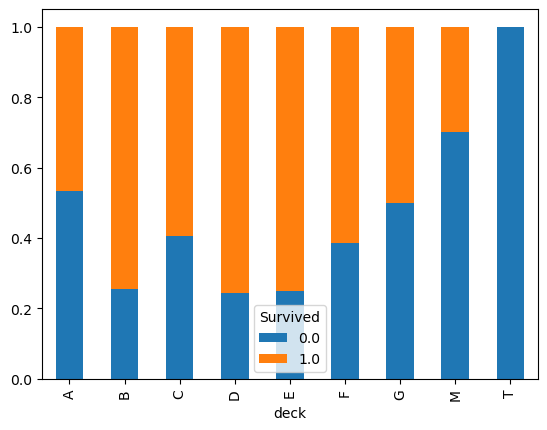

In [93]:
pd.crosstab(df.deck , df.Survived , normalize = 'index').plot(kind = 'bar' , stacked = True)
